<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=2e10f451e2cb96a1ad4e96fe7346408a66a3de7022362959a50436234fe25cc1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

In [7]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [4]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 4.1 범주형 변수

성별, 학력, 고용형태 와 같은 정보는 범주현 특성에 속한다. 이는 크기, 나이와 같은 연속형 특성과 구분된다. 즉 정량적이 아닌 정성적 속성이다.

### 4.1.1 원-핫-인코딩(가변수)
범주형 변수를 표현하는 데 가장 널리 쓰이는 방법은 원-핫-인코딩이다. 이를 가변수라고도 한다. 이는 범주형 변수를 0또는 1값을 가진 하나 이상의 새로운 특성으로 바꾼것이다.

In [5]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### 문자열로된 범주형 데이터 확인하기
이처럼 데이터셋을 읽고 나면, 먼저 열에 어떤 의미있는 범주형 데이터가 있는지 확인해보는 것이 좋다. 사용자로 부터 입력받은 데이터를 다룰 때는 정해진 범주 밖의 값이 있을 수도 있고 철자나 대소문자가 틀려서 데이터를 전처리해야 할 수 있다. male or man
열의 내용을 확인하는 방법은 pandas value_counts 메서드를 활용하는 방법이다.

In [8]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


수정할 사항이 없다. 실제로은 value 값들을 살펴보고 그 값들을 수정해야 할 때가 많지만 여기서는 넘어가겠다.
pandas 에서 get_dummies 함수를 사용한다면 데이터를 매우 쉽게 인코딩할 수 있다. 해당 함수는 객체 타입이나 범추령을 가진 열을 자동으로 변환해준다.

In [11]:
print("orign data feature:\n", list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print("get dummise feature: \n", list(data_dummies.columns))

orign data feature:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get dummise feature: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct

In [13]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [14]:
# 타깃값 분리

features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# numpy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [16]:
# 모델 학습

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print('test score: {:.2f}'.format(logreg.score(X_test, y_test)))

test score: 0.81


data 특성을 몇가지 더 추가하고 기존 연속형을 범주형 age > 20. 30 .40. 50... 등으로 변경해보면 어떨까.


## 4.1.2 숫자로 표현된 범주형 특성

adult 데이터셋의 경우 범주형 변수가 문자열로 인코딩되어 있다. 철자 오류가 날 수 있지만. 다른 한편 변수가 범우형이란 것을 확실하게 알려준다. 하지만 여러 이유로 범주형 변수가 숫자로 인코딩된 경우가 많다.(0,1,2 으로 체크박스 표시순 등으로)

\
pandas 의 get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각해서 가변수를 만들지 않는다. 

In [17]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만든다.
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1], '범주형 특성':['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [18]:
# get_dummies 함수. 문자열 특성만 인코딩됨, 숫자는 그대로
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [19]:
# '숫자 특성'도 가변수로 만들고 싶다면 columms 매개변수에 인코딩하고 싶은 열을 명시한다.
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# 4.2 OneHotEncoder 와 ColumnTransformer: scikit-learn, 범주형 변수 다루기

scikit-learn 은 원-핫-인코딩을 수행할 수 있다. 사이킷에선 훈련셋 테스트셋를 같은 방식으로 다루기 쉬운 것이 장점이다. 원-핫-인코딩은, OneHotEncoder 클래스에 구현되어 있다. OneHotEncoder은 모든 열에 인코딩을 수행한다.

In [20]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncoder가 희소 행렬이 아니라 넘파이 배열으 반환한다.
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


문자 숫자 특성이 모두 변환되었다. sklearn-learn 출력은 DataFrame 이 아니기 때문에 열 이름이 없다. 특성에 해당하는 원본 범주형 변수 이름을 얻으려면 get_feature_names_out

In [21]:
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


원핫인코딩은 모든 특성을 범수형이라고 가정하기 때문에 애플리케이션에 바로 적용할 수는 없다. 그렇기 때문에 ColumnsTransformer 클래스가 필요하다. 이 클래스는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있다. 

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [('sclaing', StandardScaler(), ['age', 'hours-per-week']), 
     ('onehot', OneHotEncoder(sparse=False),
     ['workclass', 'education', 'gender', 'occupation'])])

In [24]:
# income을 제외한 모든 열을 추출한다.
data_features = data.drop('income', axis=1)
# df 과 income 분할
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [26]:
X_train_trans

array([[ 1.499, -0.445,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [ 2.38 , -1.668,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.25 , -0.037,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [-1.146, -0.037,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [ 0.471,  0.37 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-0.999,  0.615,  0.   , ...,  0.   ,  0.   ,  0.   ]])

pd.get_dummies를 사용했을 때와 비슷 44개의 특성 만들어짐. 연속형 스케일 조정했다는 것만 다르다.


In [30]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("test score : {:.2f}".format(logreg.score(X_test_trans, y_test)))

test score : 0.81


데이터 스케일이 영향을 미치지 못했다. 하나의 변환기로 모든 전처리 단계를 캡슐화 하면 장점이 더 있다. 나중에 더 알아보자.
ColumnsTransformer 안이 단계에 접근하려면 named_transformers_ 속성을 사용한다.

In [31]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

# 4.3 make_column_transformer로 간단하게 ColumnTransformer 만들기

클래스 이름을 기반으로 자동으로 각 단계의 이름을 붙여주는 함수. make_column_transfromer 함수

In [32]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'] ))

# 4.4 분할 구간, 이산화 그리고 선형 모델, 트리 모델

데이터를 잘 표현하는 방법은 데이터의 의미를 이해하고 거기에 맞은 모델을 사용하는 것이다. 폭 넓게 사용하는 알고리즘, 선형모델과 트리기반 모델(결정,그레디,랜덤 트리 등)은 특성 표현 방식으로 인해 미치는 영향이 매우 다르다. 2장에서 사용한 wave 데이터셋을 다시 보자.

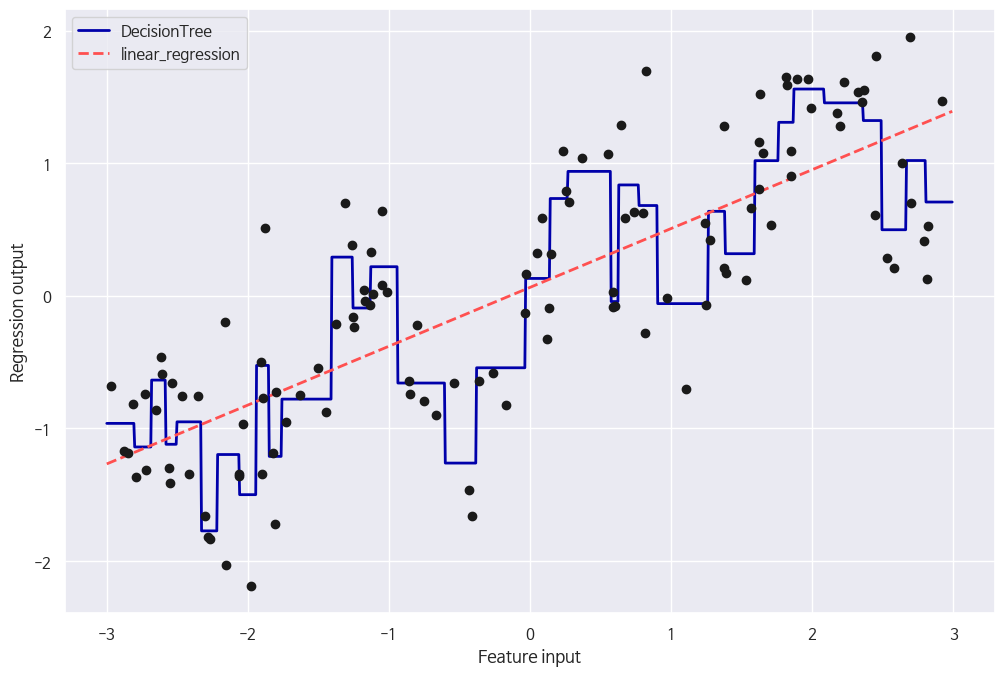

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label='DecisionTree')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label='linear_regression')

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Feature input")
plt.legend(loc='best')
